# **MACHINE LEARNING LAB - 3**

# **Problem Statement : Implement of K-Nearest Neighbor Algorithm**

## **Classification using K-Nearest Neighbors**

Load the IRIS data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import scipy.spatial
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
%matplotlib inline

In [ ]:
!wget https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

--2022-11-17 14:22:11--  https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3975 (3.9K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.88K  --.-KB/s    in 0s      

2022-11-17 14:22:12 (37.7 MB/s) - ‘iris.csv’ saved [3975/3975]



In [ ]:

df = pd.read_csv("iris.csv")

df.head()



,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Create class label/vector.

In [ ]:
x = df.drop('variety', axis=1).values
y = df['variety'].values

Data Preprocessing using column standardisation. Use sklearn.preprocessing.StandardScaler(). 

In [ ]:
scaler = StandardScaler()
scaler.fit(x)
scaled_features = scaler.transform(x)

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,sepal.length,sepal.width,petal.length,petal.width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Splitting data into Train, cross-validation and test sets with Stratified Sampling using *train_test_split()*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,
    test_size=0.2, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.20, random_state= 42)

Write your own implementation of K-NN

In [ ]:
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2)
    
    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = scipy.spatial.distance.euclidean(X_train[j] , X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(y_train[j])
            # print(votes)
            # print(Counter(votes).most_common(1))
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)
            
        return final_output
    
    def accuracy(self, predictions, y_test):
        accuracy = ((predictions == y_test).sum() / len(y_test)) * 100
        return round(accuracy, 2)

Perform hyper-parameter tuning. Here, K is a hyperparameter. <br>

Compute training accuracy and cross-validation accuracy for every value of K in [1,3,5,7,9,11,13,15,17,19,21,23,25] and choose the best K.


In [ ]:
num_neighbours = [1,3,5,7,9,11,13,15,17,19,21,23,25]
training_accuracy = []
training_error_rate = []
validation_accuracy = []
validation_error_rate = []

for i in num_neighbours:
    my_knn = KNN(i)
    my_knn.fit(X_train, y_train)
    
    # For Training data
    prediction = my_knn.predict(X_train)
    training_accuracy.append(my_knn.accuracy(prediction, y_train))
    training_error_rate.append(np.mean(prediction != y_train))
    
    # For Validation data
    prediction = my_knn.predict(X_val)
    validation_accuracy.append(my_knn.accuracy(prediction, y_val))
    validation_error_rate.append(np.mean(prediction != y_val))

Plot the "Hyperparameter vs. accuracy" graph for training and CV sets.

Text(0, 0.5, 'training accuracy in %')

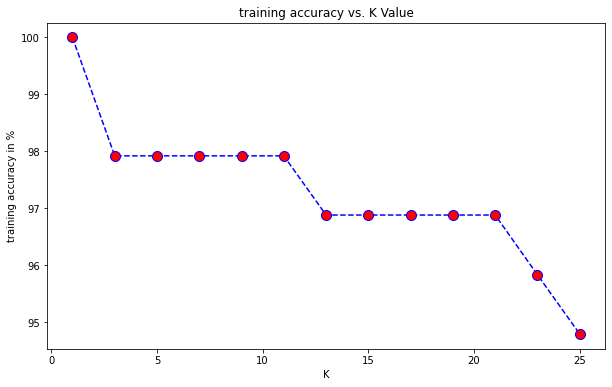

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(num_neighbours, training_accuracy, 'b--', marker='o', markerfacecolor='red', markersize=10)
plt.title('training accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('training accuracy in %')

Text(0, 0.5, 'validation accuracy in %')

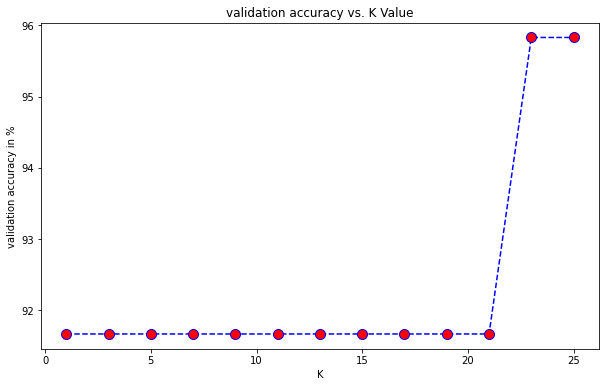

In [ ]:

plt.figure(figsize=(10,6))
plt.plot(num_neighbours, validation_accuracy, 'b--', marker='o', markerfacecolor='red', markersize=10)
plt.title('validation accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('validation accuracy in %')


Plot the training and CV errors graphs w.r.t. different values of K. Write your observations for overfitting and underfitting.

Text(0, 0.5, 'Training Error Rate')

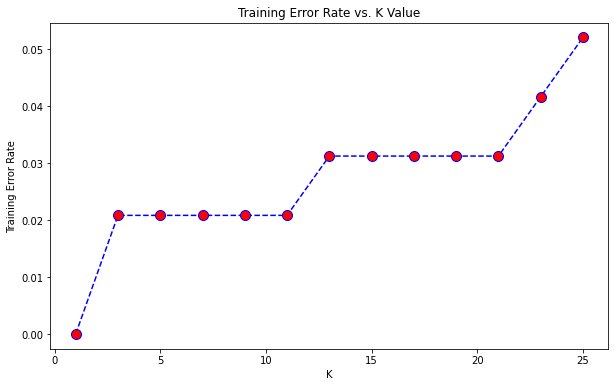

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(num_neighbours,training_error_rate,'b--', marker='o',markerfacecolor='red', markersize=10)
plt.title('Training Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Training Error Rate')

Text(0, 0.5, 'validation Error Rate')

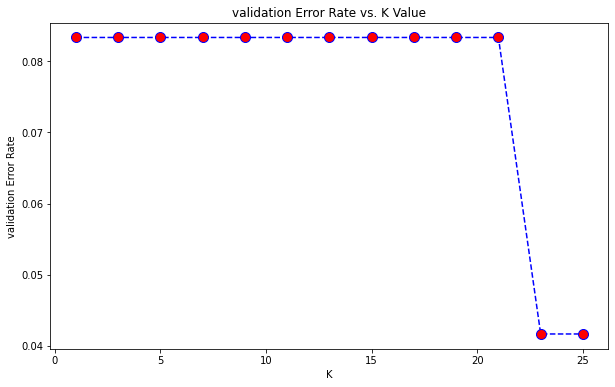

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(num_neighbours,validation_error_rate,'b--', marker='o',markerfacecolor='red', markersize=10)
plt.title('validation Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('validation Error Rate')

Text(0, 0.5, 'Test Error Rate')

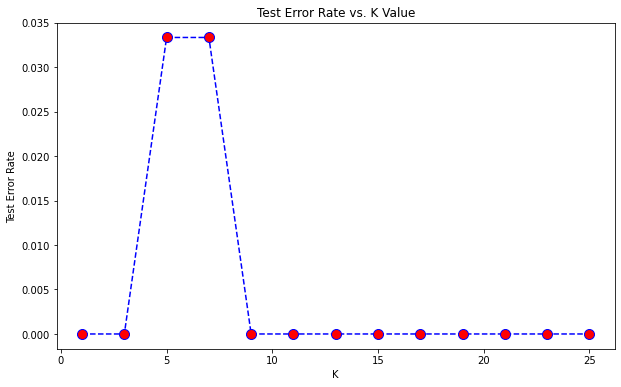

In [ ]:
test_error_rate = []

for i in num_neighbours:

    my_knn = KNN(i)
    my_knn.fit(X_train, y_train)
    prediction = my_knn.predict(X_test)
    test_error_rate.append(np.mean(prediction != y_test))

    
plt.figure(figsize=(10,6))
plt.plot(num_neighbours,test_error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Test Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Test Error Rate')





Compare your implementation with sk-learn's implementation of KNN

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.30, random_state=101)

In [ ]:
neighbours_list = [1,3,5,7,9,11,13,15,17,19,21,23,25]
error_rate = []

for i in neighbours_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_Train, Y_Train)
    pred_i = knn.predict(X_Test)
    error_rate.append(np.mean(pred_i != Y_Test))

Text(0, 0.5, 'Error Rate')

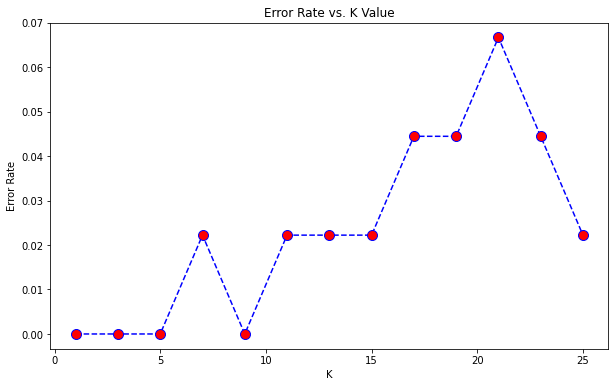

In [ ]:



plt.figure(figsize=(10,6))
plt.plot(neighbours_list,error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')






In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_Train, Y_Train)
pred = knn.predict(X_Test)

print('Confusion matrix with K=3\n')
print(confusion_matrix(Y_Test,pred))
print('\nclassification report with K=3\n')
print(classification_report(Y_Test,pred))

print("Accuracy with k=3 is", accuracy_score(Y_Test,pred)*100)

Confusion matrix with K=3

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]

classification report with K=3

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      1.00      1.00        20
   Virginica       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy with k=3 is 100.0
